In [49]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("zomato.csv", encoding = "ISO-8859-1")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


### The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

- Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

In [3]:
import matplotlib.pyplot as plt

df_india = df[df["Country Code"] == 1]
cities = ["Delhi NCR", "Rest Of India"]
rest_count = [0, 0]

total_resturants = df_india.shape[0]
# We split the India dataset into two parts, Delhi NCR and the Rest
df_delhi_ncr = df_india.loc[(df_india['City'] == "New Delhi") | (df_india['City'] == 'Gurgaon') | (df_india['City'] == 'Noida') | (df_india['City'] == 'Ghaziabad') | (df_india['City'] == 'Faridabad')]
df_rest      = df_india.loc[(df_india['City'] != "New Delhi") & (df_india['City'] != 'Gurgaon') & (df_india['City'] != 'Noida') & (df_india['City'] != 'Ghaziabad') & (df_india['City'] != 'Faridabad')]

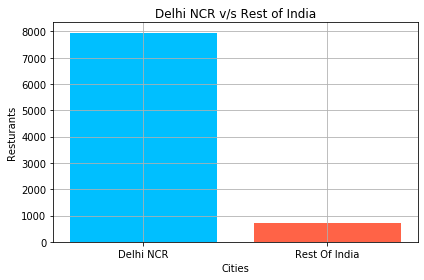

Delhi NCR 7947 
Rest of India 705


In [4]:
import matplotlib.pyplot as plt
plt.bar(cities, [df_delhi_ncr.shape[0], df_rest.shape[0]], color= ['deepskyblue', 'tomato'])
plt.title("Delhi NCR v/s Rest of India")
plt.xlabel("Cities")
plt.grid()
plt.ylabel("Resturants")
plt.tight_layout()
plt.savefig('1.png', format='png', dpi = 300)
plt.show()
print('Delhi NCR', df_delhi_ncr.shape[0], '\nRest of India',df_rest.shape[0])

- Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [5]:
delhi_cuisines = set()
rest_cuisines = set()
def getCuisines(cuisine, s):
    for c in cuisine.strip().split(','):
        s.add(c.strip())
df_delhi_ncr['Cuisines'].apply(getCuisines, s = delhi_cuisines)
df_rest['Cuisines'].apply(getCuisines, s = rest_cuisines)
delhi_cuisines,rest_cuisines

({'Afghani',
  'African',
  'American',
  'Andhra',
  'Arabian',
  'Armenian',
  'Asian',
  'Assamese',
  'Awadhi',
  'Bakery',
  'Belgian',
  'Bengali',
  'Beverages',
  'Bihari',
  'Biryani',
  'British',
  'Burger',
  'Burmese',
  'Cafe',
  'Charcoal Grill',
  'Chettinad',
  'Chinese',
  'Continental',
  'Cuisine Varies',
  'Deli',
  'Desserts',
  'Drinks Only',
  'European',
  'Fast Food',
  'Finger Food',
  'French',
  'Goan',
  'Greek',
  'Gujarati',
  'Healthy Food',
  'Hyderabadi',
  'Ice Cream',
  'Indian',
  'Indonesian',
  'Iranian',
  'Italian',
  'Japanese',
  'Juices',
  'Kashmiri',
  'Kerala',
  'Korean',
  'Lebanese',
  'Lucknowi',
  'Maharashtrian',
  'Malaysian',
  'Mangalorean',
  'Mediterranean',
  'Mexican',
  'Middle Eastern',
  'Mithai',
  'Modern Indian',
  'Moroccan',
  'Mughlai',
  'Naga',
  'Nepalese',
  'North Eastern',
  'North Indian',
  'Oriya',
  'Pakistani',
  'Parsi',
  'Persian',
  'Pizza',
  'Portuguese',
  'Rajasthani',
  'Raw Meats',
  'Salad',
  '

In [6]:
# All the cuisines present in rest_cuisines and not in delhi_cuisines
# It can be given by rest_cuisines - (rest_cuisines ∩ delhi_cuisines)
cuisine_diff = rest_cuisines.difference(rest_cuisines.intersection(delhi_cuisines))
cuisine_diff

{'BBQ', 'Cajun', 'German', 'Malwani'}

In [7]:
# Lets check if these cuisines are absent in Delhi-NCR or we have an incomplete dataset
# API Key - 2dd776197f33176ef3452f5ded8f3797

import requests
h = {'user-key' : '2dd776197f33176ef3452f5ded8f3797'}
p = {'city_id' : 1}
res = requests.get('https://developers.zomato.com/api/v2.1/cuisines', headers = h, params = p)
cus = res.json()
del_cus_api = [c['cuisine']['cuisine_name'] for c in cus['cuisines']]
print('\tPresent in Delhi-NCR(API)')
for el in cuisine_diff:
    print(el,end='')
    if el in del_cus_api:
        print('\tYes')
    else:
        print('\tNo')

	Present in Delhi-NCR(API)
German	No
Cajun	No
BBQ	Yes
Malwani	Yes


Hence we can say that German and Cajun cuisines are not present in Delhi, But Malwani and BBQ are present, and the dataset is incomplete

- Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [8]:
top_cuisines_delhi_ncr = {}
top_cuisines_rest = {}

def getTopCuisines(cuisine, d):
    for c in cuisine.strip().split(','):
        cus = c.strip()
        d[cus] = d.get(cus,0) + 1
        
df_delhi_ncr['Cuisines'].apply(getTopCuisines, d = top_cuisines_delhi_ncr)
df_rest['Cuisines'].apply(getTopCuisines, d = top_cuisines_rest)

from heapq import nlargest

top_ten_delhi_cuisines = nlargest(10, top_cuisines_delhi_ncr, key = top_cuisines_delhi_ncr.get) 
top_ten_rest_cuisines  = nlargest(10, top_cuisines_rest     , key = top_cuisines_rest.get)

# top_ten_delhi_cuisines,top_ten_rest_cuisines
top_ten_delhi_cuisines,top_ten_rest_cuisines

(['North Indian',
  'Chinese',
  'Fast Food',
  'Mughlai',
  'Bakery',
  'South Indian',
  'Continental',
  'Desserts',
  'Street Food',
  'Italian'],
 ['North Indian',
  'Chinese',
  'Continental',
  'Italian',
  'Cafe',
  'Fast Food',
  'South Indian',
  'Mughlai',
  'Desserts',
  'Mexican'])

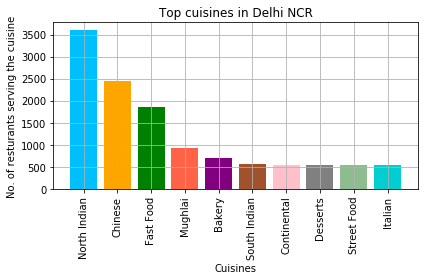

North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535


In [18]:
import matplotlib.pyplot as plt
plt.title('Top cuisines in Delhi NCR')
y = [top_cuisines_delhi_ncr[x] for x in top_ten_delhi_cuisines]
plt.bar(top_ten_delhi_cuisines, y, color= ['deepskyblue', 'orange', 'green', 'tomato', 'purple', 'sienna', 'pink', 'grey', 'darkseagreen', 'darkturquoise'])
plt.xticks(rotation = 90)
plt.grid()
plt.ylabel('No. of resturants serving the cuisine')
plt.xlabel('Cuisines')
plt.tight_layout()
plt.savefig('2.png', format='png', dpi = 300)
plt.show()
for i in range(10): 
    print(top_ten_delhi_cuisines[i], y[i])    

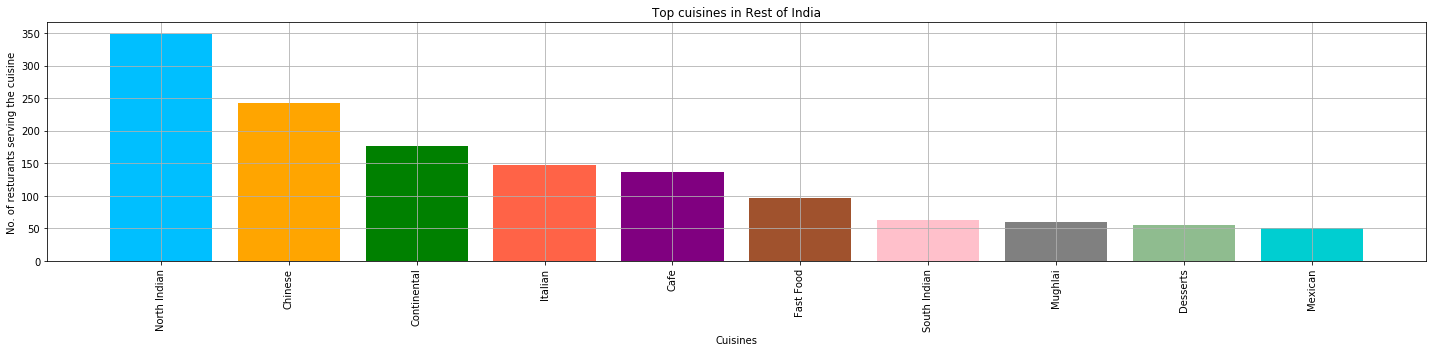

North Indian 349
Chinese 242
Fast Food 177
Mughlai 147
Bakery 136
South Indian 97
Continental 62
Desserts 59
Street Food 55
Italian 50


In [101]:
import matplotlib.pyplot as plt
plt.title('Top cuisines in Rest of India')
y = [top_cuisines_rest[x] for x in top_ten_rest_cuisines]
plt.bar(top_ten_rest_cuisines, y, color= ['deepskyblue', 'orange', 'green', 'tomato', 'purple', 'sienna', 'pink', 'grey', 'darkseagreen', 'darkturquoise'])
plt.xticks(rotation = 90)
plt.grid()
plt.ylabel("No. of resturants serving the cuisine")
plt.xlabel('Cuisines')
plt.tight_layout()
plt.savefig('3.png', format='png', dpi = 300)
plt.show()
for i in range(10): 
    print(top_ten_delhi_cuisines[i], y[i])    

## User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

### Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

1. Number of Votes given Restaurant


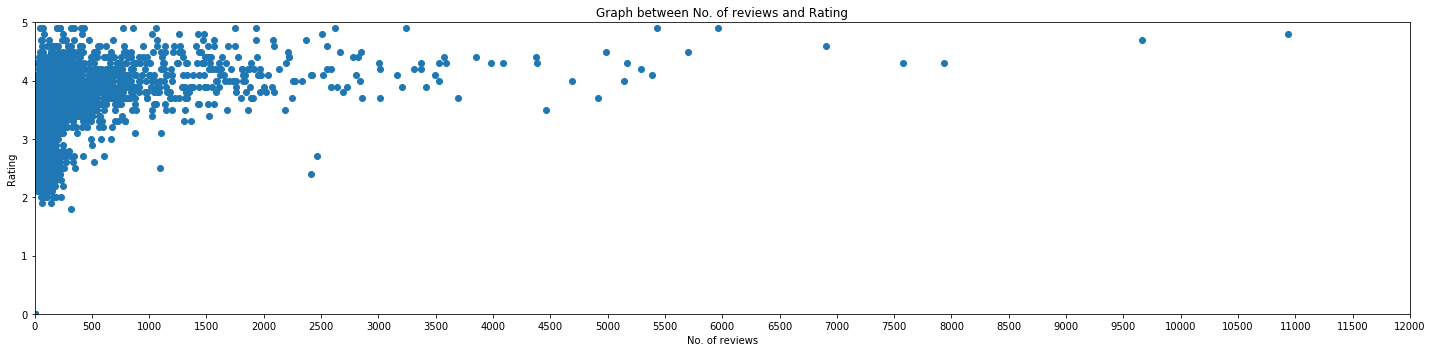

In [92]:
plt.scatter(df_india['Votes'], df_india['Aggregate rating'])
plt.ylim(0,5)
plt.xlim(0,12000)
plt.xticks(np.arange(0, 12001, 500))
plt.rcParams["figure.figsize"] = [20, 5]
plt.title('Graph between No. of reviews and Rating')
plt.xlabel('No. of reviews')
plt.ylabel("Rating")
plt.tight_layout()
plt.savefig('4.png', format='png', dpi = 300)
plt.show()

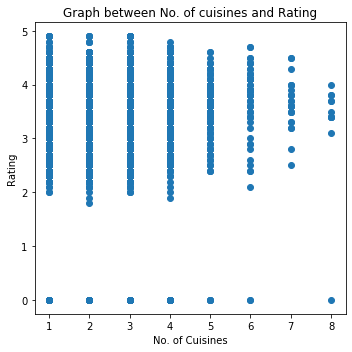

In [111]:
x = [len(cuisine_string.strip().split(',')) for cuisine_string in df_india['Cuisines']]
y = df_india['Aggregate rating']

plt.scatter(x, y)
plt.rcParams["figure.figsize"] = [5, 5]
plt.title('Graph between No. of cuisines and Rating')
plt.xlabel('No. of Cuisines')
plt.ylabel("Rating")
plt.tight_layout()
plt.savefig('5.png', format='png', dpi = 300)
plt.show()

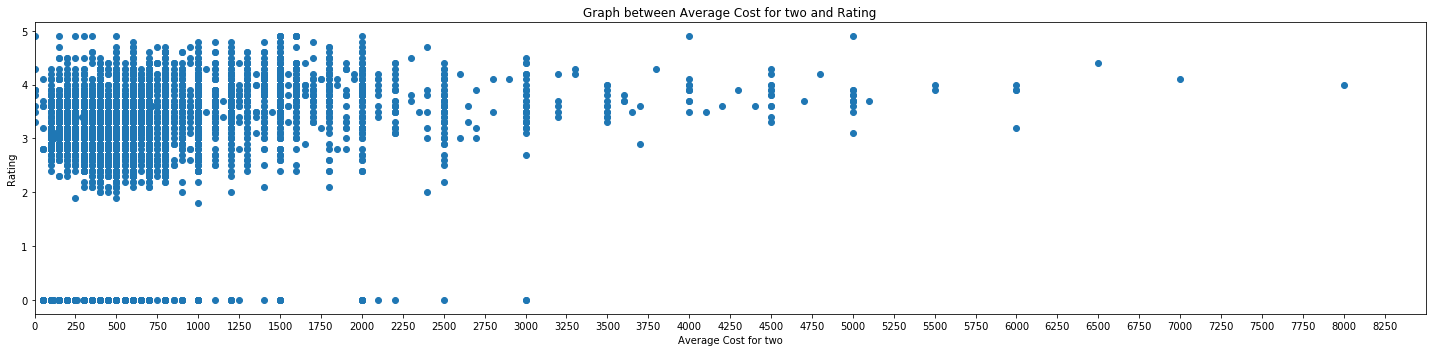

In [114]:
plt.scatter(df_india['Average Cost for two'], df_india['Aggregate rating'])
# plt.ylim(0,5)
plt.xlim(0,8500)
plt.xticks(np.arange(0, 8500, 250))
plt.rcParams["figure.figsize"] = [20, 5]
plt.title('Graph between Average Cost for two and Rating')
plt.xlabel('Average Cost for two')
plt.ylabel("Rating")
plt.tight_layout()
plt.savefig('6.png', format='png', dpi = 300)
plt.show()